## Importing the Data

In [59]:
import pandas as pd
import numpy as np
import matplotlib as plt
#import scikit-learn as sci
import scanpy as sc
import matplotlib.pyplot as plt

In [60]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
results_file = 'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/write/pbmc3k.h5ad'  

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.5


In [61]:
adata_ti = sc.read_h5ad(
   'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/endometrium_all.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_ti.var_names_make_unique()

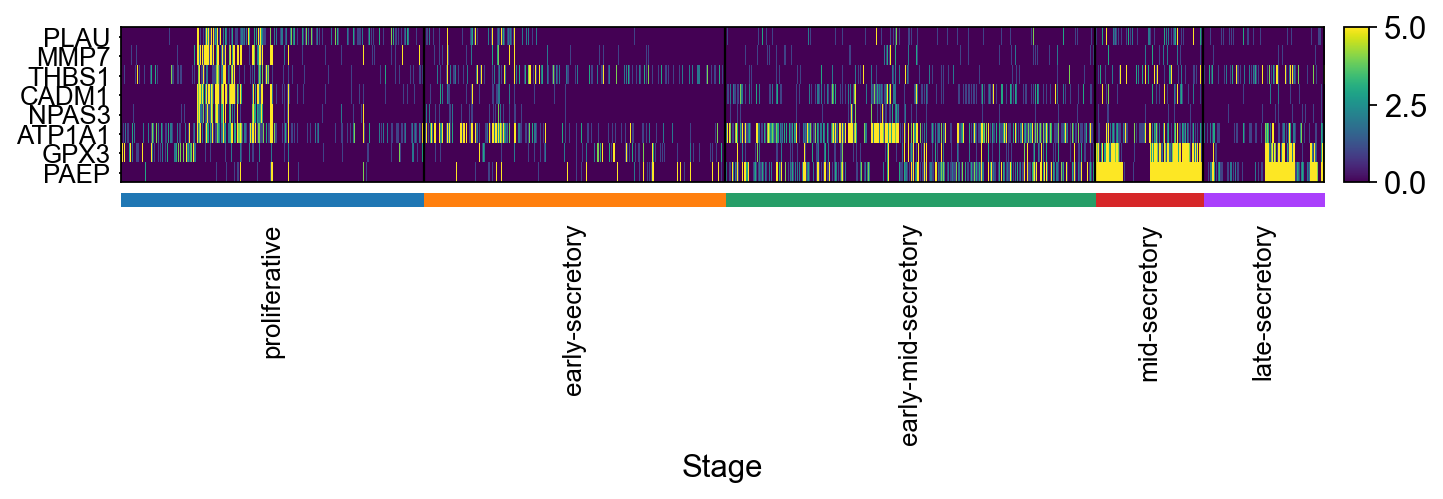

In [145]:
#markers = ['PLAU', 'MMP7', 'THBS1', 'CADM1', 'NPAS3', 'ATP1A1', 'GPX3', 'PAEP']

adata_ti.obs['Stage'].cat.reorder_categories(['proliferative', 'early-secretory', 'early-mid-secretory', 'mid-secretory', 'late-secretory'], inplace = True)

sc.pl.heatmap(adata_ti, markers, groupby='Stage', swap_axes=True, vmax=5, cmap='viridis')
         

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:54)


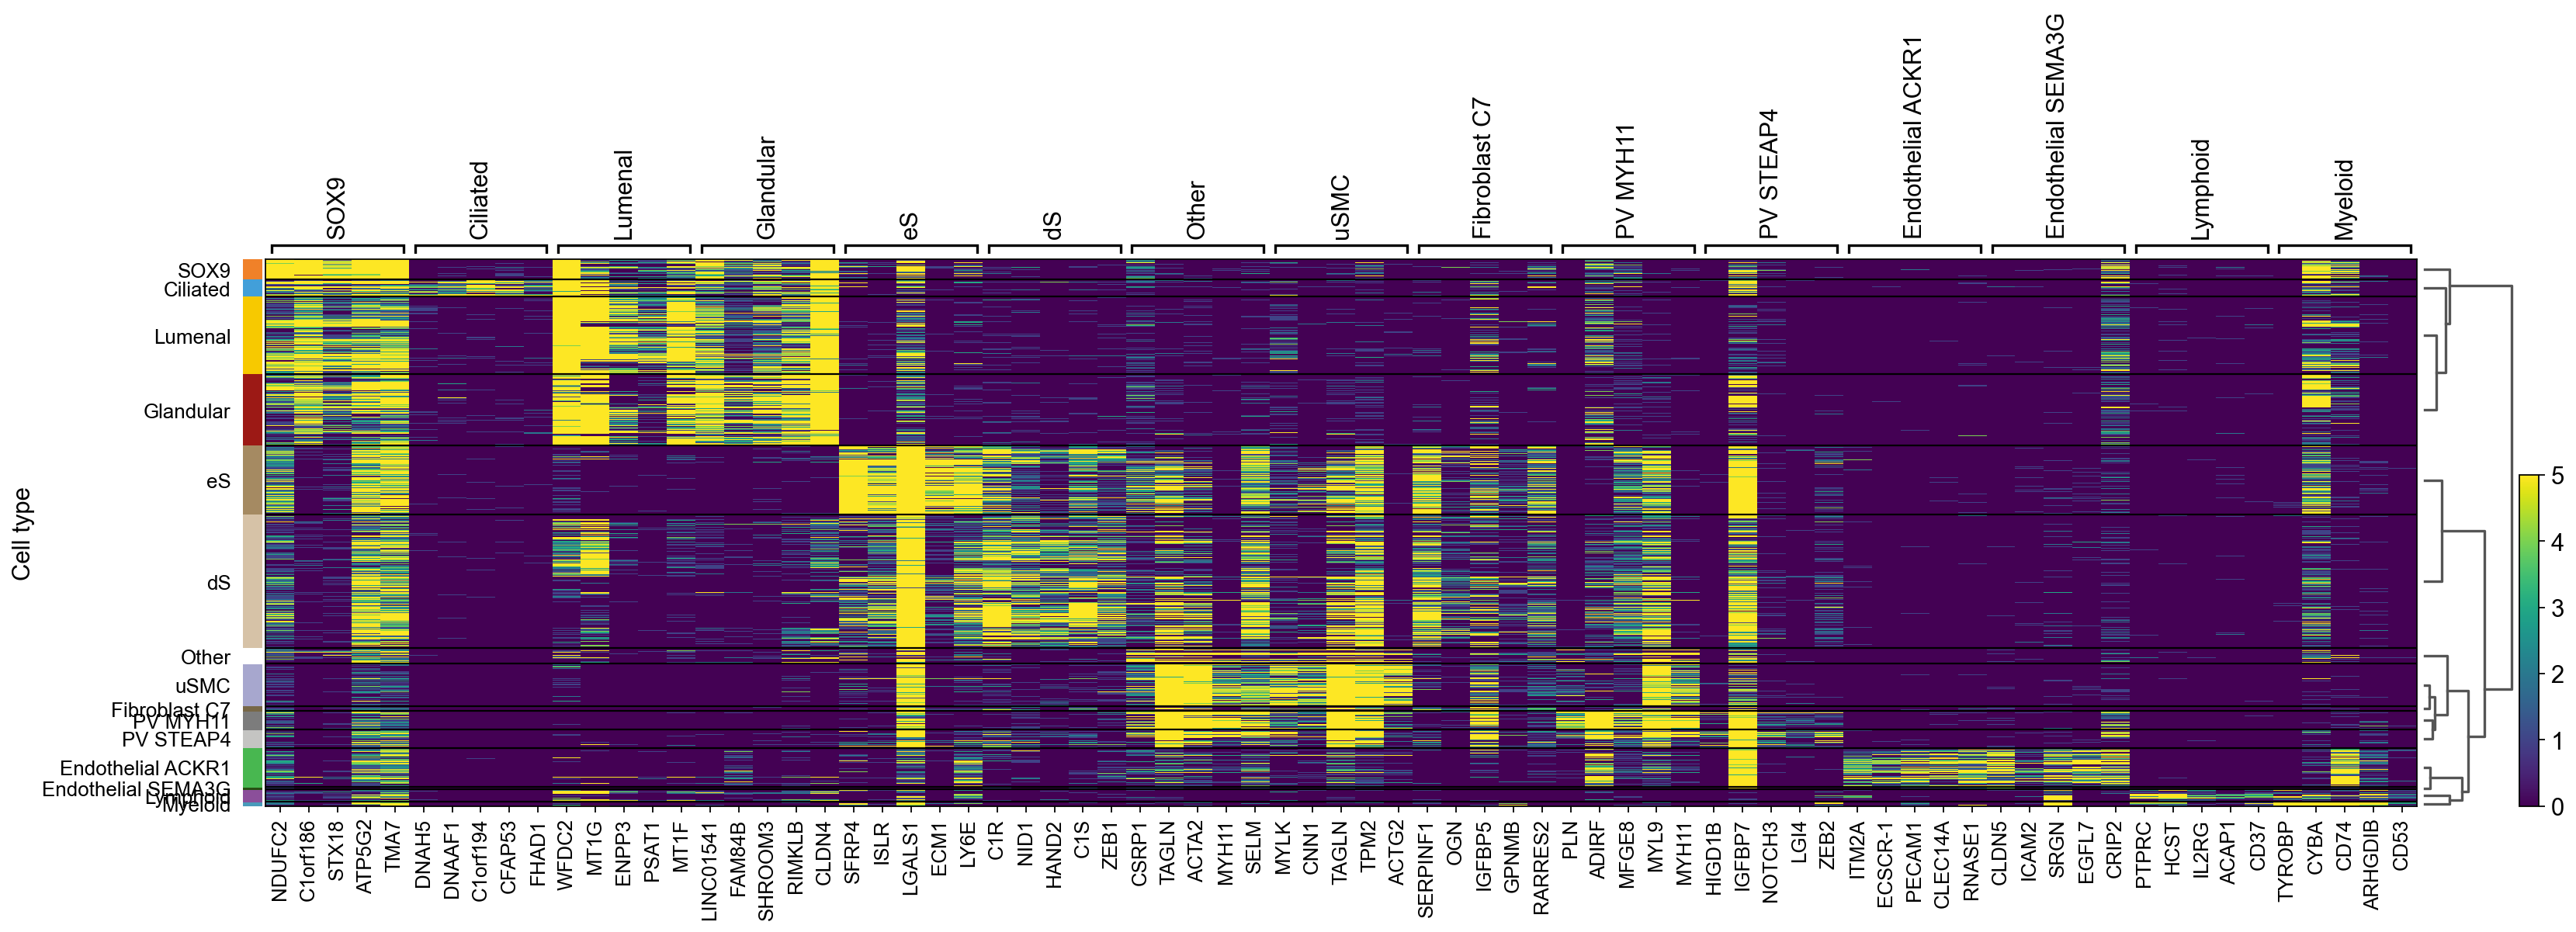

In [127]:
adata_ti_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181",:] #tissue sample 1

sc.tl.rank_genes_groups(adata_ti_1, 'Cell type')
sc.pl.rank_genes_groups_heatmap(adata_ti_1, n_genes=5, show_gene_labels=True, vmax=5)

In [88]:
adata_ti_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181",:] #tissue sample 1
adata_ti_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182",:] #tissue sample 2
adata_ti_3 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8715415",:] #tissue sample 3
adata_ti_4 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8715416",:] #tissue sample 4
adata_ti_5 = adata_ti[adata_ti.obs["SampleID"] == "GSM4577307",:] #tissue sample 5
adata_ti_6 = adata_ti[adata_ti.obs["SampleID"] == "GSM4577315",:] #tissue sample 6

In [5]:
#adata_ti.var['mt'] = adata_ti.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
#sc.pp.calculate_qc_metrics(adata_ti, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#
#sc.pp.normalize_total(adata_ti, target_sum=1e4)
#
#sc.pp.log1p(adata_ti)
#
#sc.pp.highly_variable_genes(adata_ti, min_mean=0.0125, max_mean=3, min_disp=0.5)
#
#adata_ti = adata_ti[:, adata_ti.var.highly_variable]
#
#sc.pp.regress_out(adata_ti, ['total_counts', 'pct_counts_mt'])
#
#sc.pp.scale(adata_ti, max_value=10)

normalizing counts per cell
    finished (0:00:02)
extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:09:16)


In [63]:
sc.pp.neighbors(adata_ti_1, n_neighbors=10, n_pcs=30)
sc.pp.neighbors(adata_ti_2, n_neighbors=10, n_pcs=30)
sc.pp.neighbors(adata_ti_3, n_neighbors=10, n_pcs=30)
sc.pp.neighbors(adata_ti_4, n_neighbors=10, n_pcs=30)
#sc.pp.neighbors(adata_ti_5, n_neighbors=10, n_pcs=30)
#sc.pp.neighbors(adata_ti_6, n_neighbors=10, n_pcs=30)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:45)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:50)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:25)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing neighbors
  

In [64]:
sc.tl.umap(adata_ti_1)
sc.tl.umap(adata_ti_2)
sc.tl.umap(adata_ti_3)
sc.tl.umap(adata_ti_4)
#sc.tl.umap(adata_ti_5)
#sc.tl.umap(adata_ti_6)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


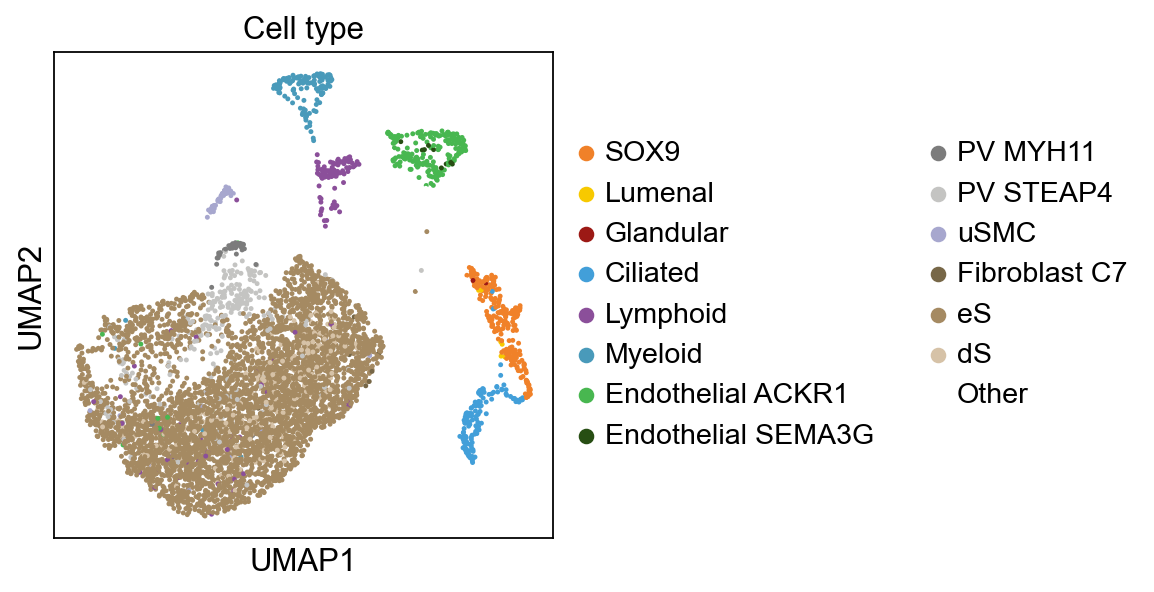

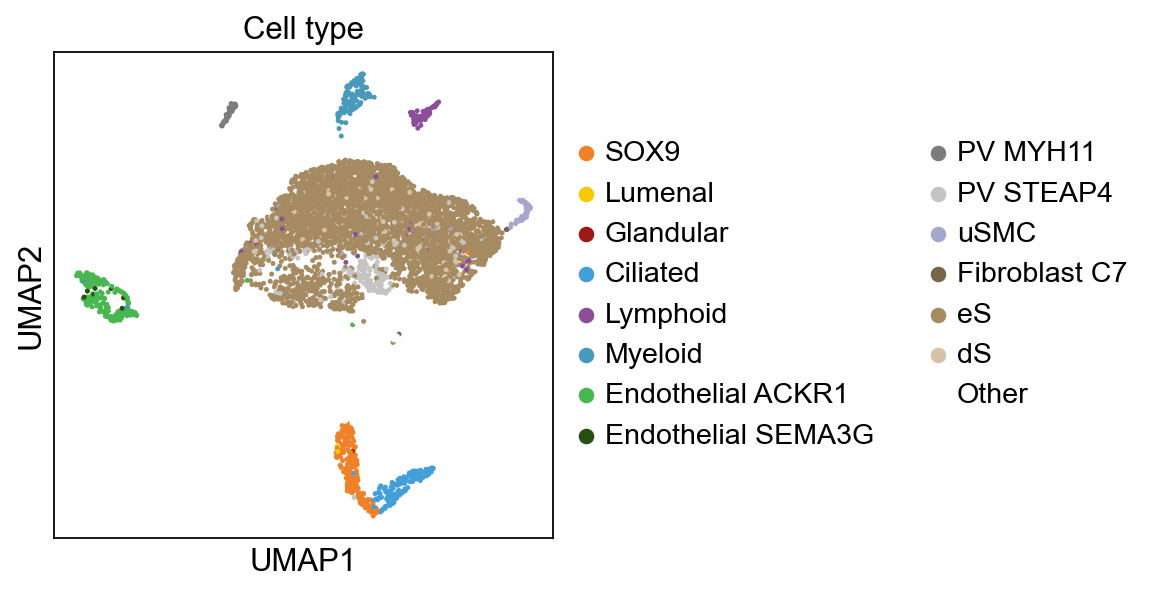

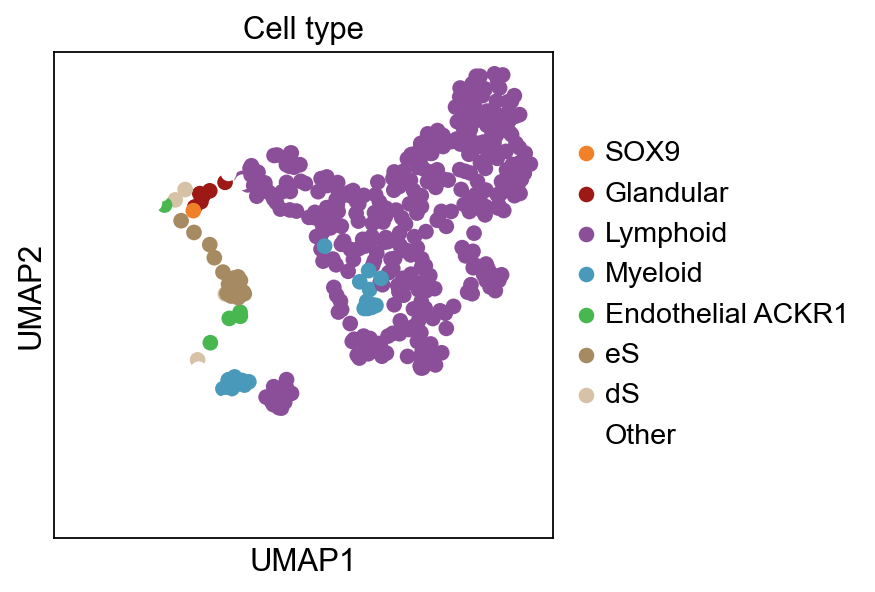

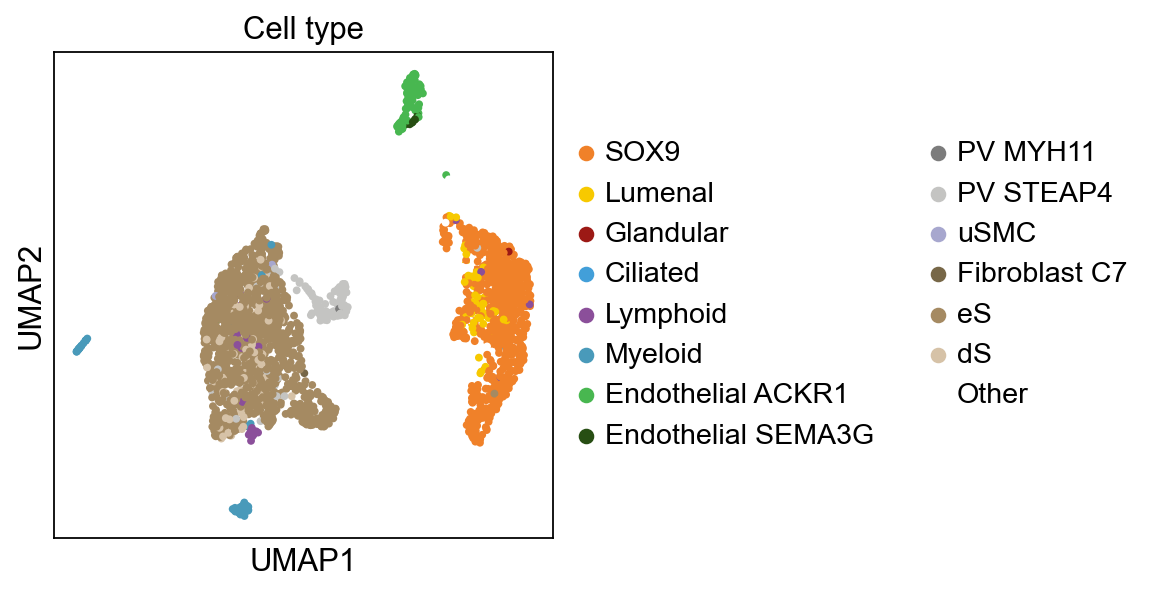

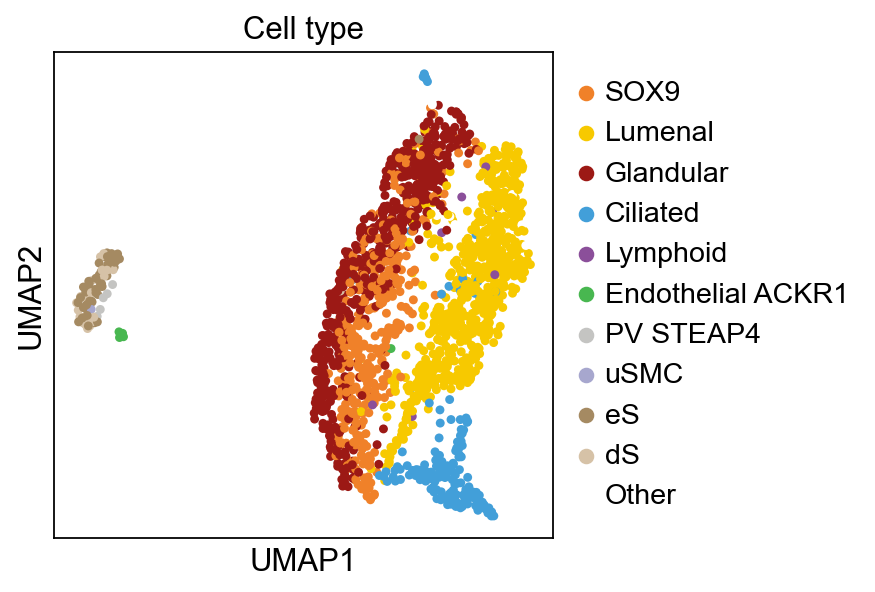

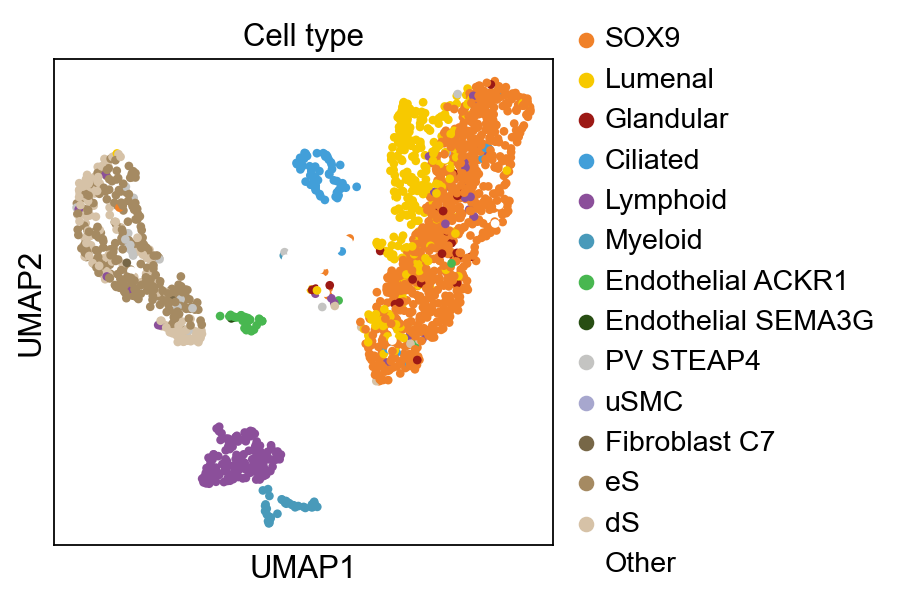

In [65]:
sc.pl.umap(adata_ti_1, color="Cell type")
sc.pl.umap(adata_ti_2, color="Cell type")
sc.pl.umap(adata_ti_3, color="Cell type")
sc.pl.umap(adata_ti_4, color="Cell type")
#sc.pl.umap(adata_ti_5, color="Cell type")
#sc.pl.umap(adata_ti_6, color="Cell type")

## Something else stuff

In [10]:
sc.tl.leiden(adata_ti_1) #ln31

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [11]:
print(adata_ti_1.var_names)

Index(['AP006222.2', 'FAM41C', 'SAMD11', 'PERM1', 'HES4', 'TNFRSF18',
       'TNFRSF4', 'SCNN1D', 'MXRA8', 'VWA1',
       ...
       'ITGB2', 'ADARB1', 'LINC00205', 'COL18A1', 'PCBP3', 'AL592528.1',
       'AJ011932.1', 'COL6A1', 'COL6A2', 'S100B'],
      dtype='object', length=3360)


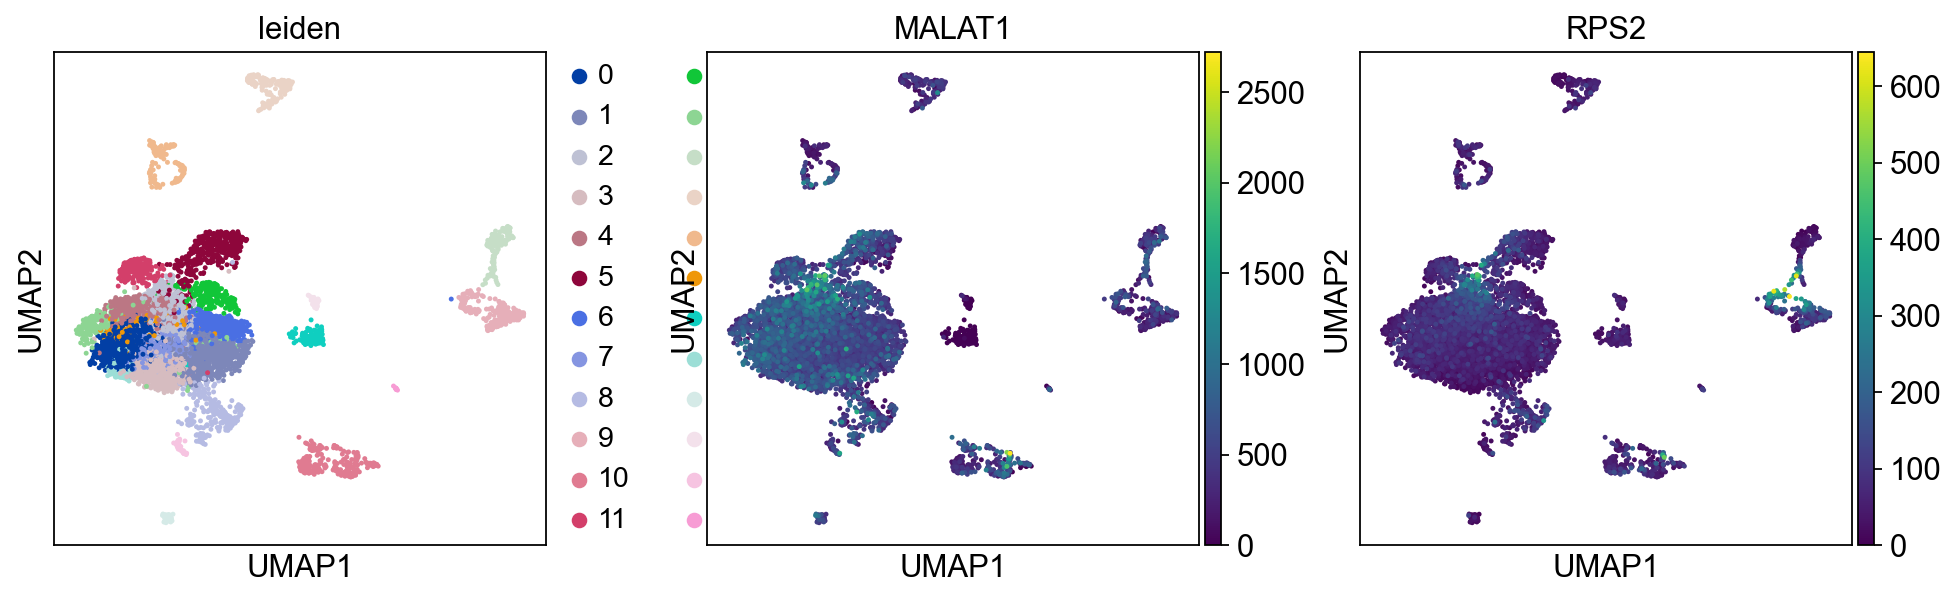

In [12]:
sc.pl.umap(adata_ti_1, color=['leiden', 'MALAT1', 'RPS2']) #ln32

In [ ]:
#adata.write(results_file) #ln33

## Annotating the cells

In [ ]:
adata_ref = sc.datasets.pbmc3k_processed()

In [ ]:
adata_ref.obs['SampleID']='pbmc3k'

print(adata_ref.shape)
adata_ref.obs

In [ ]:
sc.pl.umap(adata_ref, color='louvain')

## Finding marker genes

In [ ]:
    #t-test: compute a ranking for the highly differential genes in each cluster:

sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False) #ln34

sc.settings.verbosity = 2  # reduce the verbosity #ln35

    #result of a Wilcoxon rank-sum test:

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False) #ln36

adata.write(results_file) #ln37

    #rank genes using logistic regression:

sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False) #ln38

In [ ]:
#marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
#                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
#                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP'] #ln39
#
#genes_list = ['NCR3', 'MMP1', 'MMP3', 'MMP10', 'Wnt5', 'Wnt7a', 'MMP26', 'TFF3', 'Hoxa10', 'Hoxa11', 'Conenxin-37', 
#              'Hoxb7', 'sFRP', 'MMP11', 'tPA', 'PLAT', 'ADAM12', 'IGF', 'TGF', 'FGF1', 'HGF', 'FGFR3']
#
#top_20_Organoid_Control = ['FTH1', 'MALAT1', 'EEF1A1', 'MT-CO3', 'TPT1', 'MT-CO1', 'RPS2', 'TMSB4X', 'MT-CO2', 
#          'RPL10', 'MT-ATP6', 'MMP7', 'RPL13', 'PTMA', 'MT-CYB', 'ACTG1', 'RPL3', 'RPLP1', 
#          'RPS12', 'RPS18']
#
#genes_epi = ['PLAU', 'MMP7', 'THBS1', 'CADM1', 'NPAS3', 'ATP1A1', 'ANK3', 'ALPL', 'TRAK1', 
#         'SCGB1D2', 'MT1F', 'MT1X', 'MT1E', 'MT1G', 'CXCL14', 'MAOA', 'DPP4', 'NUPR1', 'GPX3'
#        'PAEP']
#
#genes_str = ['STC1', 'NFATC2', 'BMP2', 'PMAIP1', 'MMP11', 'SFRP1', 'WNT5A', 'ZFYVE21', 'CILP', 
#             'SLF2', 'MATN2', 'S100A4', 'DKK1', 'CRYAB', 'FOXO1', 'IL15', 'FGF7', 'LMCD1']
#
#genes_early = ['MMP26', 'TFF3', 'Hoxa10', 'Hoxa11', 'Conenxin-37', 'Hoxb7', 'sFRP', 'WIF', 'TGFB2', 'CCL18', 'PGR', 'ESR1'] 
#
#genes_late = ['SOX4', 'ADAMTS5', 'GNG4', 'Integrina2', 'EBAF', 'MMP7', 'proMMP3', 'EDNRB', 'MMP10', 'MMP', 'PLAU', 'PLAT', 
#              'ADAM', 'PAEP', 'CIQTNF6'] 
#
#important_genes = []

In [ ]:
    #reload the object that has been saved with the Wilcoxon Rank-Sum test result:

#adata = sc.read(results_file) #ln40

In [ ]:
adata.obs

In [ ]:
    #show the 10 top ranked genes per cluster in a dataframe:

pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10) #ln41

In [ ]:
    #Get a table with the scores and groups:

result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5) #ln42

In [ ]:
    #Compare to a single cluster:

sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20) #ln43

    #more detailed view for a certain group:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
    #reload the objects with the computed differential expression:
adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
    #If we want to compare a certain gene across groups:
sc.pl.violin(adata, ['MMP7', 'RPS2', 'PTMA'], groupby='leiden')

In [ ]:
    #actually mark/annotate the cell types:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
    #visualize the marker genes:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

## dotplot

In [ ]:
    #quick way to check the expression of genes

sc.pl.dotplot(adata, marker_genes, 'clusters', dendrogram=True)

## matrixplot

In [ ]:
sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Heatmaps

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes, groupby='clusters', cmap='viridis', dendrogram=True, swap_axes=True)

sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);